Esse código tem como objetivo fazer o download e devida guarda de dados da PIM-PF baixados do sistema Sidra do IBGE:

https://sidra.ibge.gov.br/

Para consultar dados de códigos do api do Sidra IBGE:

https://apisidra.ibge.gov.br/

In [132]:
#Instalação de pacote de gráficos

pip install pandas matplotlib seaborn

In [133]:
# Importando bibliotecas necessárias:

import requests # biblioteca para acessar e interagir com APIs e páginas da web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
#Bibliotecas de tratamento de estatistico de séries e de manipulação de datas e horários:

from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

In [139]:
#Biblioteca para Análise de Estacionariedade por Teste de ADF

from statsmodels.tsa.stattools import adfuller

In [140]:
# Biblioteca para Geração de Gráfico de Função de Autocorrelação e Autocorrelação Parcial

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

In [142]:
# Biblioteca para decomposição da Série de Tempo

from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Intalação da biblioteca para acesso ao Sidra:

!pip install -U sidrapy

In [6]:
# Importando biblioteca do Sidra - IBGE:

import sidrapy

In [7]:
# Visualização de ferramentas / funções disponíveis na biblioteca:

dir(sidrapy)

['VERSION',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_table',
 'resources',
 'table']

### Criação de  dataframes receptores de dados da PIM-PF da tabela 888 - " PIMPF - Número-índice (2022=100) (Número-índice) - casas decimais: padrão = 5, máximo = 5 (janeiro de 2002 = 100)":

In [8]:
#Definição de uma variável clas que é uma lista contendo os códigos das classificações que se deseja obter da tabela 8888 do
#Sidra IBGE para PIM-PF - Número índice sem ajuste sazonal. Esses códigos devem ser strings

clas = [
    "129316", "129317", "129318", "129319", "129320", "129321", "129322", "129323",
    "129324", "129325", "129326", "56689", "129330", "129331", "129332", "129333",
    "129334", "129335", "129336", "129337", "129338", "129339", "129340", "129341",
    "129342"
]

len(clas)

25

In [10]:
for i in clas:
    #Criando dataframe com o número da classificação
    df_name = pd.DataFrame()
    df_name = f"df_{i}"
    
    #Criação de dataframe buscando dados no Sidra, utilizando função get_table
    df= sidrapy.get_table(
        table_code = "8888",
        variable = "12606",
        classifications={"544":str(i)},
        territorial_level="1",
        ibge_territorial_code="all",
        period="all",
        header='n',
        format='pandas'
    )
    
    #Renomeando colunas de interesse
    df = df.rename(columns = {"MN": "U. Medida", "V": str(df.iloc[1,-1]), "D2C": "Data"})
    
    #Exclusão de colunas que não são de interesse
    df = df.loc[:,["Data","U. Medida",str(df.iloc[1,-1])]]
    
    #Ajuste da Data como índice
    df = df.set_index("Data")
    
    #Dataframe vazio criado na primeira etapa, cujo nome contém o número da classificação recebe os dados do dataframe df
    globals()[df_name] = df
        

In [13]:
clas

['129316',
 '129317',
 '129318',
 '129319',
 '129320',
 '129321',
 '129322',
 '129323',
 '129324',
 '129325',
 '129326',
 '56689',
 '129330',
 '129331',
 '129332',
 '129333',
 '129334',
 '129335',
 '129336',
 '129337',
 '129338',
 '129339',
 '129340',
 '129341',
 '129342']

In [14]:
#Concatenando todos os dataframes criados num único dataframe contendo dados da tabela 8888 - Número índice do Sidra IBGE

df_8888_ind = pd.concat([df_129316,df_129317.iloc[:,-1],df_129318.iloc[:,-1], df_129319.iloc[:,-1],df_129320.iloc[:,-1], df_129321.iloc[:,-1],
               df_129322.iloc[:,-1], df_129323.iloc[:,-1], df_129324.iloc[:,-1], df_129325.iloc[:,-1], df_129326.iloc[:,-1],
               df_56689.iloc[:,-1], df_129330.iloc[:,-1], df_129331.iloc[:,-1], df_129332.iloc[:,-1], df_129333.iloc[:,-1],
               df_129334.iloc[:,-1], df_129335.iloc[:,-1], df_129336.iloc[:,-1], df_129337.iloc[:,-1], df_129338.iloc[:,-1],
               df_129339.iloc[:,-1], df_129340.iloc[:,-1], df_129341.iloc[:,-1], df_129342.iloc[:,-1]], axis = 1)

In [15]:
df_8888_ind

,U. Medida,3 Indústrias de transformação,3.10 Fabricação de produtos alimentícios,3.11 Fabricação de bebidas,3.12 Fabricação de produtos do fumo,3.13 Fabricação de produtos têxteis,3.14 Confecção de artigos do vestuário e acessórios,"3.15 Preparação de couros e fabricação de artefatos de couro, artigos para viagem e calçados",3.16 Fabricação de produtos de madeira,"3.17 Fabricação de celulose, papel e produtos de papel",...,3.24 Metalurgia,"3.25 Fabricação de produtos de metal, exceto máquinas e equipamentos","3.26 Fabricação de equipamentos de informática, produtos eletrônicos e ópticos","3.27 Fabricação de máquinas, aparelhos e materiais elétricos",3.28 Fabricação de máquinas e equipamentos,"3.29 Fabricação de veículos automotores, reboques e carrocerias","3.30 Fabricação de outros equipamentos de transporte, exceto veículos automotores",3.31 Fabricação de móveis,3.32 Fabricação de produtos diversos,"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"
Data,,,,,,,,,,,,,,,,,,,,,
200201,Número-índice,85.14812,82.51886,62.53335,76.39757,171.17767,146.97768,175.11372,108.28328,65.41773,...,96.26855,107.88055,105.75245,96.56653,62.23485,72.60072,61.81587,134.02874,103.77091,-
200202,Número-índice,82.08498,76.09358,57.82431,109.88529,170.89122,157.81697,160.73440,97.90458,59.97418,...,93.69049,115.18651,99.65788,88.55418,66.73521,74.06187,56.04452,114.46782,90.41531,-
200203,Número-índice,90.96360,80.99840,60.67149,206.75265,184.34960,185.05559,191.27271,111.51380,64.72716,...,101.20347,118.69180,116.03333,94.94183,73.86466,85.37216,66.61859,134.97946,95.92660,-
200204,Número-índice,93.77772,86.08528,62.63140,236.35534,192.55466,197.93528,205.26340,114.97550,64.42123,...,97.06768,131.88761,127.42721,103.15985,76.45942,91.68735,74.70428,145.59466,98.29857,-
200205,Número-índice,94.70631,94.72804,62.29452,220.23175,183.06361,190.78067,197.63409,115.73291,62.61467,...,103.52002,124.28954,117.11845,94.67316,77.85233,85.92352,72.37397,136.07957,97.50967,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202411,Número-índice,103.95266,102.26901,104.86737,64.57226,111.25488,112.84687,110.25497,103.20829,97.22856,...,104.74123,104.58675,100.73412,105.22689,101.03314,108.98648,118.08561,121.14067,97.28565,96.88729
202412,Número-índice,90.97686,93.33385,111.59063,47.50298,85.83669,80.40414,72.58791,92.45452,101.01172,...,84.71011,91.09557,83.24464,90.86447,81.69140,88.82298,90.31433,95.21684,69.02243,92.85557
202501,Número-índice,94.26696,96.37515,104.95460,56.87515,104.80764,76.65892,93.31497,100.23916,96.38956,...,99.12818,98.17868,92.97835,97.46569,93.93590,90.06828,111.91668,100.12243,84.86109,98.45550


Dados das desagregações abaixo estão apenas disponíveis a partir de janeiro de 2012.

"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"

"3.18 Impressão e reprodução de gravações"

In [35]:
#Reset do índice numérico em ordem crescente

df_8888_ind.reset_index(inplace = True)

In [37]:
#Criação de uma cópia do dataframe para trabalho

df1_8888_ind = df_8888_ind.copy()

Deve-se notar que os dados de valores do dataframe são strings. Portanto devem ser convertidos para float

In [40]:
#Conversão das colunas com dados numéricos em formato string para float

cols = df1_8888_ind.columns
df1_8888_ind[cols[2:]] = df1_8888_ind[cols[2:]].apply(pd.to_numeric, errors='coerce')

In [42]:
df1_8888_ind.iloc[2,2]

90.9636

In [43]:
type(df1_8888_ind.iloc[2,2])

numpy.float64

Código para download dos mesmos parâmetros da tabela 8888 porém agora para "PIMPF - Número-índice com ajuste sazonal (2022=100) (Número-índice) - casas decimais: padrão = 5, máximo = 5" - categoria 12607

In [45]:
for i in clas:
    #Criando dataframe com o número da classificação
    df_name = pd.DataFrame()
    df_name = f"df_{i}"
    
    #Criação de dataframe buscando dados no Sidra, utilizando função get_table
    df = sidrapy.get_table(
        table_code = "8888",
        variable = "12607",
        classifications={"544":str(i)},
        territorial_level="1",
        ibge_territorial_code="all",
        period="all",
        header='n',
        format='pandas'
    )
    
    #Renomeando colunas de interesse
    df = df.rename(columns = {"MN": "U. Medida", "V": str(df.iloc[1,-1]), "D2C": "Data"})
    
    #Exclusão de colunas que não são de interesse
    df = df.loc[:,["Data","U. Medida",str(df.iloc[1,-1])]]
    
    #Ajuste da Data como índice
    df = df.set_index("Data")
    
    #Dataframe vazio criado na primeira etapa, cujo nome contém o número da classificação recebe os dados do dataframe df
    globals()[df_name] = df
        

In [46]:
#Concatenando todos os dataframes criados num único dataframe contendo dados da tabela 8888 - Número índice com ajuste sazonal do Sidra IBGE

df_8888_ind_saz = pd.concat([df_129316,df_129317.iloc[:,-1],df_129318.iloc[:,-1], df_129319.iloc[:,-1],df_129320.iloc[:,-1], df_129321.iloc[:,-1],
               df_129322.iloc[:,-1], df_129323.iloc[:,-1], df_129324.iloc[:,-1], df_129325.iloc[:,-1], df_129326.iloc[:,-1],
               df_56689.iloc[:,-1], df_129330.iloc[:,-1], df_129331.iloc[:,-1], df_129332.iloc[:,-1], df_129333.iloc[:,-1],
               df_129334.iloc[:,-1], df_129335.iloc[:,-1], df_129336.iloc[:,-1], df_129337.iloc[:,-1], df_129338.iloc[:,-1],
               df_129339.iloc[:,-1], df_129340.iloc[:,-1], df_129341.iloc[:,-1], df_129342.iloc[:,-1]], axis = 1)

Dados das desagregações abaixo estão apenas disponíveis a partir de janeiro de 2012.

"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"

"3.18 Impressão e reprodução de gravações"

In [63]:
#Reset do índice numérico em ordem crescente

df_8888_ind_saz.reset_index(inplace = True)

In [65]:
#Criação de uma cópia do dataframe para trabalho

df1_8888_ind_saz = df_8888_ind_saz.copy()

Deve-se notar que os dados de valores do dataframe são strings. Portanto devem ser convertidos para float

In [66]:
#Conversão das colunas com dados numéricos em formato string para float

cols = df1_8888_ind_saz.columns
df1_8888_ind_saz[cols[2:]] = df1_8888_ind_saz[cols[2:]].apply(pd.to_numeric, errors='coerce')

In [67]:
df1_8888_ind_saz.iloc[2,2]

93.28288

In [69]:
type(df1_8888_ind_saz.iloc[2,2])

numpy.float64

Código para download dos mesmos parâmetros da tabela 8888 porém agora para " PIMPF - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%) - casas decimais: padrão = 1, máximo = 1" - categoria 11601

In [104]:
for i in clas:
    #Criando dataframe com o número da classificação
    df_name = pd.DataFrame()
    df_name = f"df_{i}"
    
    #Criação de dataframe buscando dados no Sidra, utilizando função get_table
    df = sidrapy.get_table(
        table_code = "8888",
        variable = "11601",
        classifications={"544":str(i)},
        territorial_level="1",
        ibge_territorial_code="all",
        period="all",
        header='n',
        format='pandas'
    )
    
    #Renomeando colunas de interesse
    df = df.rename(columns = {"MN": "U. Medida", "V": str(df.iloc[1,-1]), "D2C": "Data"})
    
    #Exclusão de colunas que não são de interesse
    df = df.loc[:,["Data","U. Medida",str(df.iloc[1,-1])]]
    
    #Ajuste da Data como índice
    df = df.set_index("Data")
    
    #Dataframe vazio criado na primeira etapa, cujo nome contém o número da classificação recebe os dados do dataframe df
    globals()[df_name] = df

In [105]:
#Concatenando todos os dataframes criados num único dataframe contendo dados da tabela 8888 - Variação Mensal com ajuste sazonal do Sidra IBGE

df_8888_var = pd.concat([df_129316,df_129317.iloc[:,-1],df_129318.iloc[:,-1], df_129319.iloc[:,-1],df_129320.iloc[:,-1], df_129321.iloc[:,-1],
               df_129322.iloc[:,-1], df_129323.iloc[:,-1], df_129324.iloc[:,-1], df_129325.iloc[:,-1], df_129326.iloc[:,-1],
               df_56689.iloc[:,-1], df_129330.iloc[:,-1], df_129331.iloc[:,-1], df_129332.iloc[:,-1], df_129333.iloc[:,-1],
               df_129334.iloc[:,-1], df_129335.iloc[:,-1], df_129336.iloc[:,-1], df_129337.iloc[:,-1], df_129338.iloc[:,-1],
               df_129339.iloc[:,-1], df_129340.iloc[:,-1], df_129341.iloc[:,-1], df_129342.iloc[:,-1]], axis = 1)

In [106]:
#Reset do índice numérico em ordem crescente

df_8888_var.reset_index(inplace = True)

In [107]:
df_8888_var

,Data,U. Medida,3 Indústrias de transformação,3.10 Fabricação de produtos alimentícios,3.11 Fabricação de bebidas,3.12 Fabricação de produtos do fumo,3.13 Fabricação de produtos têxteis,3.14 Confecção de artigos do vestuário e acessórios,"3.15 Preparação de couros e fabricação de artefatos de couro, artigos para viagem e calçados",3.16 Fabricação de produtos de madeira,...,3.24 Metalurgia,"3.25 Fabricação de produtos de metal, exceto máquinas e equipamentos","3.26 Fabricação de equipamentos de informática, produtos eletrônicos e ópticos","3.27 Fabricação de máquinas, aparelhos e materiais elétricos",3.28 Fabricação de máquinas e equipamentos,"3.29 Fabricação de veículos automotores, reboques e carrocerias","3.30 Fabricação de outros equipamentos de transporte, exceto veículos automotores",3.31 Fabricação de móveis,3.32 Fabricação de produtos diversos,"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"
0,200201,%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
1,200202,%,2.7,2.1,1.9,-3.6,0.6,0.5,-1.6,-2.2,...,4.2,8.7,0.3,-1.2,2.1,7.0,7.8,-1.2,-0.7,-
2,200203,%,-1.1,-0.2,2.6,-2.2,-0.4,2.4,7.2,3.1,...,-3.2,-4.6,-3.0,-0.2,2.0,-0.8,-2.6,2.2,-7.0,-
3,200204,%,0.3,-1.2,-0.1,2.5,2.9,0.4,4.1,2.1,...,-0.1,8.4,-3.3,0.5,2.7,2.2,9.2,-0.3,0.8,-
4,200205,%,-0.1,-0.5,2.4,-5.4,-4.3,-3.4,-2.2,0.4,...,1.6,-6.2,-3.3,-3.6,0.1,-4.0,-6.6,-5.3,-1.2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,202411,%,-1.2,-0.6,-2.5,-13.4,1.7,-2.2,-1.7,-0.5,...,-0.2,1.6,3.6,-1.3,3.9,-7.0,4.5,-1.1,1.1,1.1
275,202412,%,-0.7,1.9,3.3,-6.5,1.4,3.1,-6.9,-2.4,...,-1.2,0.0,-0.7,-2.3,-3.1,-3.4,-3.9,-4.9,-9.7,-3.9
276,202501,%,0.8,0.0,0.2,5.3,1.6,-6.6,10.5,0.8,...,0.4,-1.5,-3.4,1.7,5.6,2.4,-0.1,5.0,11.9,6.4
277,202502,%,-0.4,1.7,-0.1,0.4,0.3,0.6,-0.7,-8.8,...,0.0,-0.8,-0.9,-1.3,-1.6,-1.2,2.5,-1.6,-5.7,1.3


In [108]:
#Criação de uma cópia do dataframe para trabalho

df1_8888_var = df_8888_var.copy()

Deve-se notar que os dados de valores do dataframe são strings. Portanto devem ser convertidos para float. Antes dessa conversão, entretanto, é necessário excluir a primeira linha que contém dados "...".

In [109]:
#Remoção da primeira linha

df1_8888_var.drop(0, inplace = True)

In [110]:
df1_8888_var

,Data,U. Medida,3 Indústrias de transformação,3.10 Fabricação de produtos alimentícios,3.11 Fabricação de bebidas,3.12 Fabricação de produtos do fumo,3.13 Fabricação de produtos têxteis,3.14 Confecção de artigos do vestuário e acessórios,"3.15 Preparação de couros e fabricação de artefatos de couro, artigos para viagem e calçados",3.16 Fabricação de produtos de madeira,...,3.24 Metalurgia,"3.25 Fabricação de produtos de metal, exceto máquinas e equipamentos","3.26 Fabricação de equipamentos de informática, produtos eletrônicos e ópticos","3.27 Fabricação de máquinas, aparelhos e materiais elétricos",3.28 Fabricação de máquinas e equipamentos,"3.29 Fabricação de veículos automotores, reboques e carrocerias","3.30 Fabricação de outros equipamentos de transporte, exceto veículos automotores",3.31 Fabricação de móveis,3.32 Fabricação de produtos diversos,"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"
1,200202,%,2.7,2.1,1.9,-3.6,0.6,0.5,-1.6,-2.2,...,4.2,8.7,0.3,-1.2,2.1,7.0,7.8,-1.2,-0.7,-
2,200203,%,-1.1,-0.2,2.6,-2.2,-0.4,2.4,7.2,3.1,...,-3.2,-4.6,-3.0,-0.2,2.0,-0.8,-2.6,2.2,-7.0,-
3,200204,%,0.3,-1.2,-0.1,2.5,2.9,0.4,4.1,2.1,...,-0.1,8.4,-3.3,0.5,2.7,2.2,9.2,-0.3,0.8,-
4,200205,%,-0.1,-0.5,2.4,-5.4,-4.3,-3.4,-2.2,0.4,...,1.6,-6.2,-3.3,-3.6,0.1,-4.0,-6.6,-5.3,-1.2,-
5,200206,%,0.4,2.7,2.1,0.5,-1.5,-5.3,-12.8,5.0,...,1.2,0.4,-3.7,6.2,0.8,-0.3,5.1,1.3,-2.8,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,202411,%,-1.2,-0.6,-2.5,-13.4,1.7,-2.2,-1.7,-0.5,...,-0.2,1.6,3.6,-1.3,3.9,-7.0,4.5,-1.1,1.1,1.1
275,202412,%,-0.7,1.9,3.3,-6.5,1.4,3.1,-6.9,-2.4,...,-1.2,0.0,-0.7,-2.3,-3.1,-3.4,-3.9,-4.9,-9.7,-3.9
276,202501,%,0.8,0.0,0.2,5.3,1.6,-6.6,10.5,0.8,...,0.4,-1.5,-3.4,1.7,5.6,2.4,-0.1,5.0,11.9,6.4
277,202502,%,-0.4,1.7,-0.1,0.4,0.3,0.6,-0.7,-8.8,...,0.0,-0.8,-0.9,-1.3,-1.6,-1.2,2.5,-1.6,-5.7,1.3


Deve-se notar que os dados de valores do dataframe são strings. Portanto devem ser convertidos para float

Dados das desagregações abaixo estão apenas disponíveis a partir de janeiro de 2012.

"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"

"3.18 Impressão e reprodução de gravações"

In [111]:
#Reset do índice numérico em ordem crescente

df1_8888_var.reset_index(inplace = True)

In [115]:
df1_8888_var.drop("index", axis = 1, inplace = True)

In [117]:
#Conversão das colunas com dados numéricos em formato string para float

cols = df1_8888_var.columns
df1_8888_var[cols[2:]] = df1_8888_var[cols[2:]].apply(pd.to_numeric, errors='coerce')

In [120]:
df1_8888_var.iloc[2,2]

0.3

In [121]:
type(df1_8888_var.iloc[2,2])

numpy.float64

In [124]:
df1_8888_var

,Data,U. Medida,3 Indústrias de transformação,3.10 Fabricação de produtos alimentícios,3.11 Fabricação de bebidas,3.12 Fabricação de produtos do fumo,3.13 Fabricação de produtos têxteis,3.14 Confecção de artigos do vestuário e acessórios,"3.15 Preparação de couros e fabricação de artefatos de couro, artigos para viagem e calçados",3.16 Fabricação de produtos de madeira,...,3.24 Metalurgia,"3.25 Fabricação de produtos de metal, exceto máquinas e equipamentos","3.26 Fabricação de equipamentos de informática, produtos eletrônicos e ópticos","3.27 Fabricação de máquinas, aparelhos e materiais elétricos",3.28 Fabricação de máquinas e equipamentos,"3.29 Fabricação de veículos automotores, reboques e carrocerias","3.30 Fabricação de outros equipamentos de transporte, exceto veículos automotores",3.31 Fabricação de móveis,3.32 Fabricação de produtos diversos,"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"
0,200202,%,2.7,2.1,1.9,-3.6,0.6,0.5,-1.6,-2.2,...,4.2,8.7,0.3,-1.2,2.1,7.0,7.8,-1.2,-0.7,NaN
1,200203,%,-1.1,-0.2,2.6,-2.2,-0.4,2.4,7.2,3.1,...,-3.2,-4.6,-3.0,-0.2,2.0,-0.8,-2.6,2.2,-7.0,NaN
2,200204,%,0.3,-1.2,-0.1,2.5,2.9,0.4,4.1,2.1,...,-0.1,8.4,-3.3,0.5,2.7,2.2,9.2,-0.3,0.8,NaN
3,200205,%,-0.1,-0.5,2.4,-5.4,-4.3,-3.4,-2.2,0.4,...,1.6,-6.2,-3.3,-3.6,0.1,-4.0,-6.6,-5.3,-1.2,NaN
4,200206,%,0.4,2.7,2.1,0.5,-1.5,-5.3,-12.8,5.0,...,1.2,0.4,-3.7,6.2,0.8,-0.3,5.1,1.3,-2.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,202411,%,-1.2,-0.6,-2.5,-13.4,1.7,-2.2,-1.7,-0.5,...,-0.2,1.6,3.6,-1.3,3.9,-7.0,4.5,-1.1,1.1,1.1
274,202412,%,-0.7,1.9,3.3,-6.5,1.4,3.1,-6.9,-2.4,...,-1.2,0.0,-0.7,-2.3,-3.1,-3.4,-3.9,-4.9,-9.7,-3.9
275,202501,%,0.8,0.0,0.2,5.3,1.6,-6.6,10.5,0.8,...,0.4,-1.5,-3.4,1.7,5.6,2.4,-0.1,5.0,11.9,6.4
276,202502,%,-0.4,1.7,-0.1,0.4,0.3,0.6,-0.7,-8.8,...,0.0,-0.8,-0.9,-1.3,-1.6,-1.2,2.5,-1.6,-5.7,1.3


As desagregações da PIM-PF por enquanto não serão utilizadas.

Para previsão do IPCA de bens industriais serão utilizados os dados de variação mensal % de produção da indústria de transformação.

## Ajuste do formato de data para AAAA - MM - DD

In [123]:
#Download da biblioteca de formatação de data
from datetime import datetime

In [125]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '2/1/2002', 
                         end = '03/31/2025', 
                         freq = 'M')

In [126]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe da variação mensal da PIM-PF

len(date_rng) == len(df1_8888_var.index)

True

In [128]:
#Inclusão do dataframe date_rng no dataframe:

df1_8888_var.insert(0,        # coluna de indice 0
                  'Mês',    # nome da nova coluna
                  date_rng)  # dados

In [130]:
#Exclusão da coluna "Data"

df1_8888_var = df1_8888_var.drop(["Data"], axis = 1)

In [131]:
df1_8888_var

,Mês,U. Medida,3 Indústrias de transformação,3.10 Fabricação de produtos alimentícios,3.11 Fabricação de bebidas,3.12 Fabricação de produtos do fumo,3.13 Fabricação de produtos têxteis,3.14 Confecção de artigos do vestuário e acessórios,"3.15 Preparação de couros e fabricação de artefatos de couro, artigos para viagem e calçados",3.16 Fabricação de produtos de madeira,...,3.24 Metalurgia,"3.25 Fabricação de produtos de metal, exceto máquinas e equipamentos","3.26 Fabricação de equipamentos de informática, produtos eletrônicos e ópticos","3.27 Fabricação de máquinas, aparelhos e materiais elétricos",3.28 Fabricação de máquinas e equipamentos,"3.29 Fabricação de veículos automotores, reboques e carrocerias","3.30 Fabricação de outros equipamentos de transporte, exceto veículos automotores",3.31 Fabricação de móveis,3.32 Fabricação de produtos diversos,"3.33 Manutenção, reparação e instalação de máquinas e equipamentos"
0,2002-02-28,%,2.7,2.1,1.9,-3.6,0.6,0.5,-1.6,-2.2,...,4.2,8.7,0.3,-1.2,2.1,7.0,7.8,-1.2,-0.7,NaN
1,2002-03-31,%,-1.1,-0.2,2.6,-2.2,-0.4,2.4,7.2,3.1,...,-3.2,-4.6,-3.0,-0.2,2.0,-0.8,-2.6,2.2,-7.0,NaN
2,2002-04-30,%,0.3,-1.2,-0.1,2.5,2.9,0.4,4.1,2.1,...,-0.1,8.4,-3.3,0.5,2.7,2.2,9.2,-0.3,0.8,NaN
3,2002-05-31,%,-0.1,-0.5,2.4,-5.4,-4.3,-3.4,-2.2,0.4,...,1.6,-6.2,-3.3,-3.6,0.1,-4.0,-6.6,-5.3,-1.2,NaN
4,2002-06-30,%,0.4,2.7,2.1,0.5,-1.5,-5.3,-12.8,5.0,...,1.2,0.4,-3.7,6.2,0.8,-0.3,5.1,1.3,-2.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2024-11-30,%,-1.2,-0.6,-2.5,-13.4,1.7,-2.2,-1.7,-0.5,...,-0.2,1.6,3.6,-1.3,3.9,-7.0,4.5,-1.1,1.1,1.1
274,2024-12-31,%,-0.7,1.9,3.3,-6.5,1.4,3.1,-6.9,-2.4,...,-1.2,0.0,-0.7,-2.3,-3.1,-3.4,-3.9,-4.9,-9.7,-3.9
275,2025-01-31,%,0.8,0.0,0.2,5.3,1.6,-6.6,10.5,0.8,...,0.4,-1.5,-3.4,1.7,5.6,2.4,-0.1,5.0,11.9,6.4
276,2025-02-28,%,-0.4,1.7,-0.1,0.4,0.3,0.6,-0.7,-8.8,...,0.0,-0.8,-0.9,-1.3,-1.6,-1.2,2.5,-1.6,-5.7,1.3


## Avaliação da Série de Variação Mensal % de Produção da Indústria de Transformação com Ajuste Sazonal

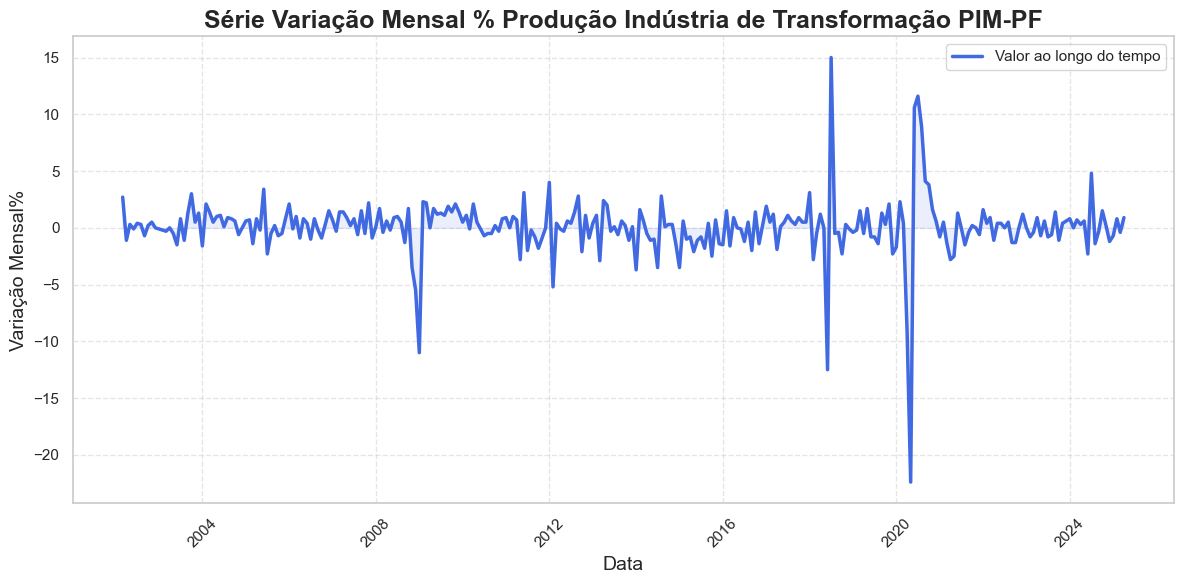

In [137]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1_8888_var["Mês"], df1_8888_var["3 Indústrias de transformação"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df1_8888_var["Mês"], df1_8888_var["3 Indústrias de transformação"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série Variação Mensal % Produção Indústria de Transformação PIM-PF', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Avaliação de Estacionariedade da Série

In [141]:
#Teste de ADF - Variação Mensal da Produção da Indústria de Transformação

resultado = adfuller(df1_8888_var["3 Indústrias de transformação"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -11.272971
p-value: 0.000000
Valores Críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Para o nível de confiança de 95%, rejeita-se a hipótese de que a série da Variação Mensal da Produção da Indústria de Transformação SEM AJUSTE SAZONAL não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [143]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos. Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df1_8888_var["3 Indústrias de transformação"], model='additive', period = 12)

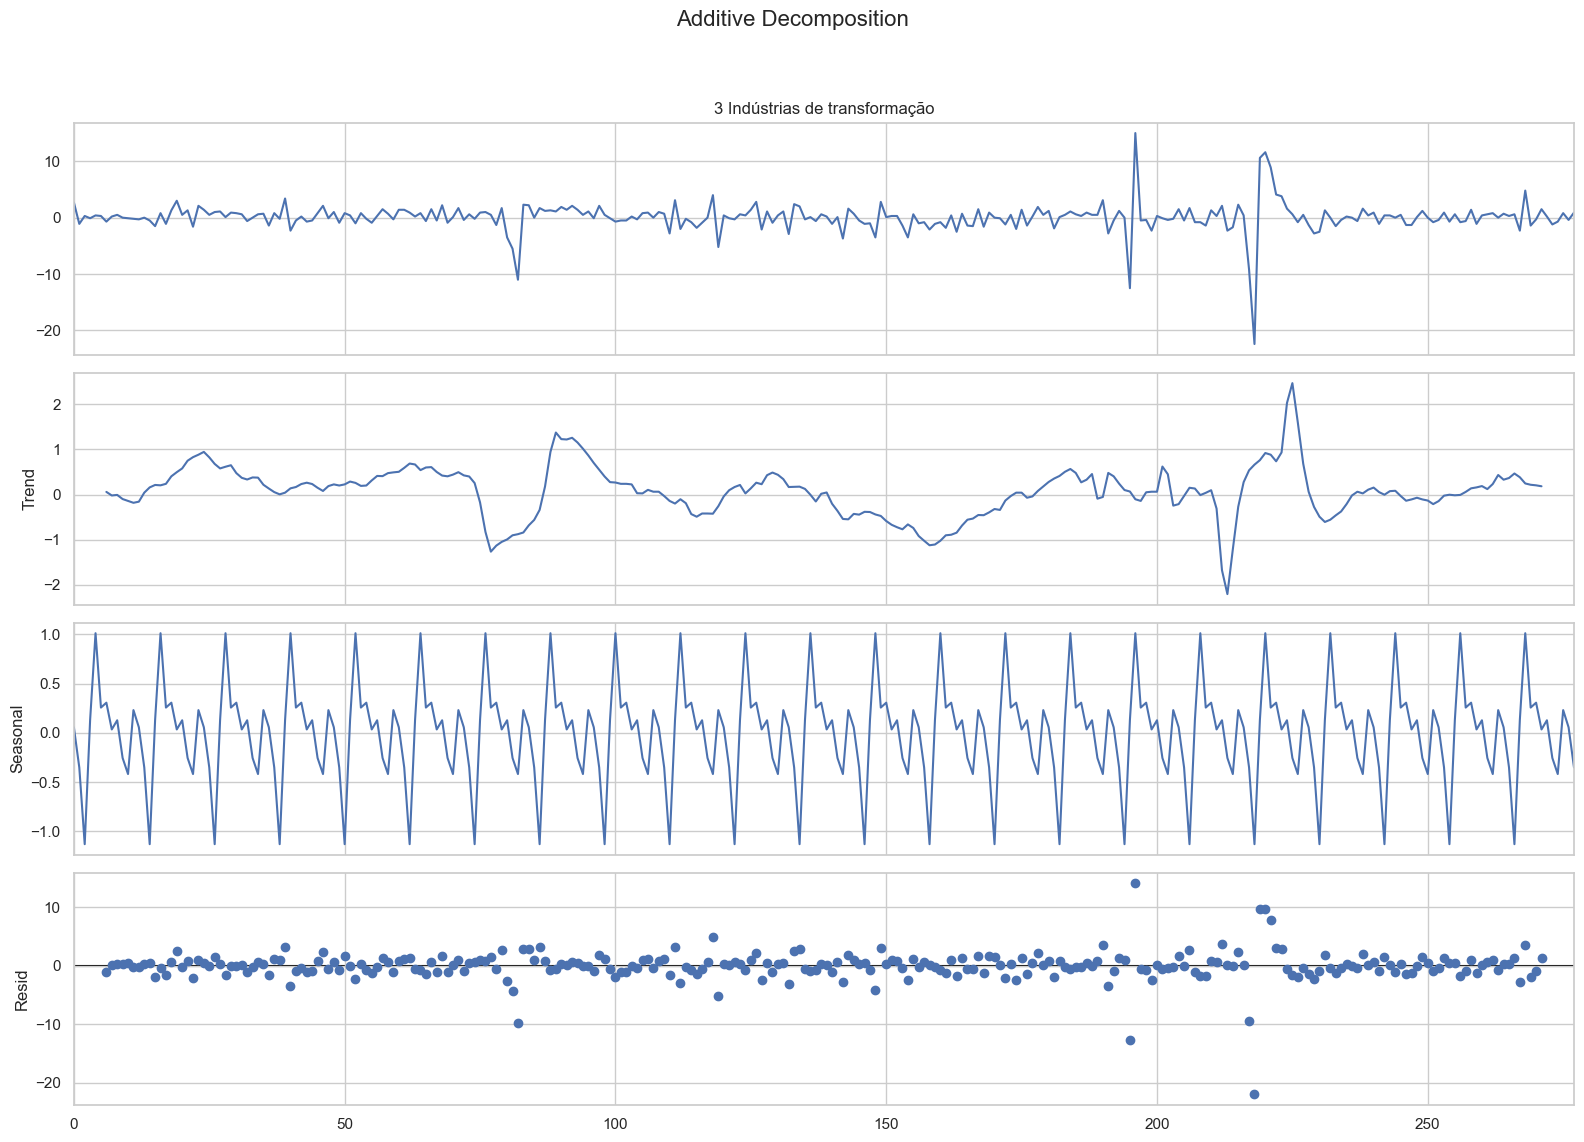

In [144]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

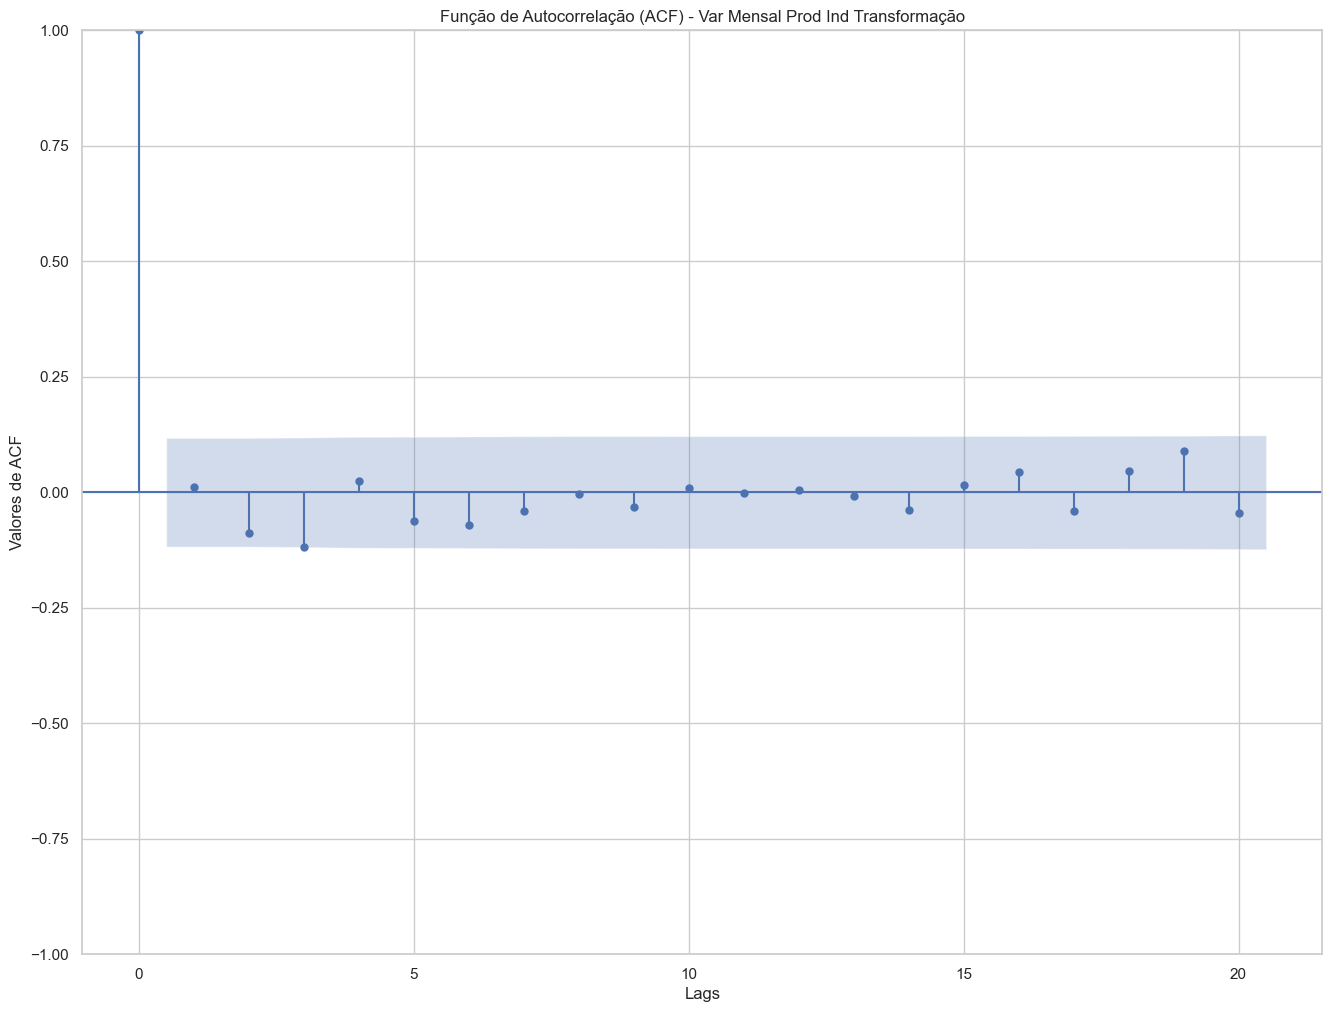

In [146]:
#Gráfico de ACF

plot_acf(df1_8888_var["3 Indústrias de transformação"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal Prod Ind Transformação")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

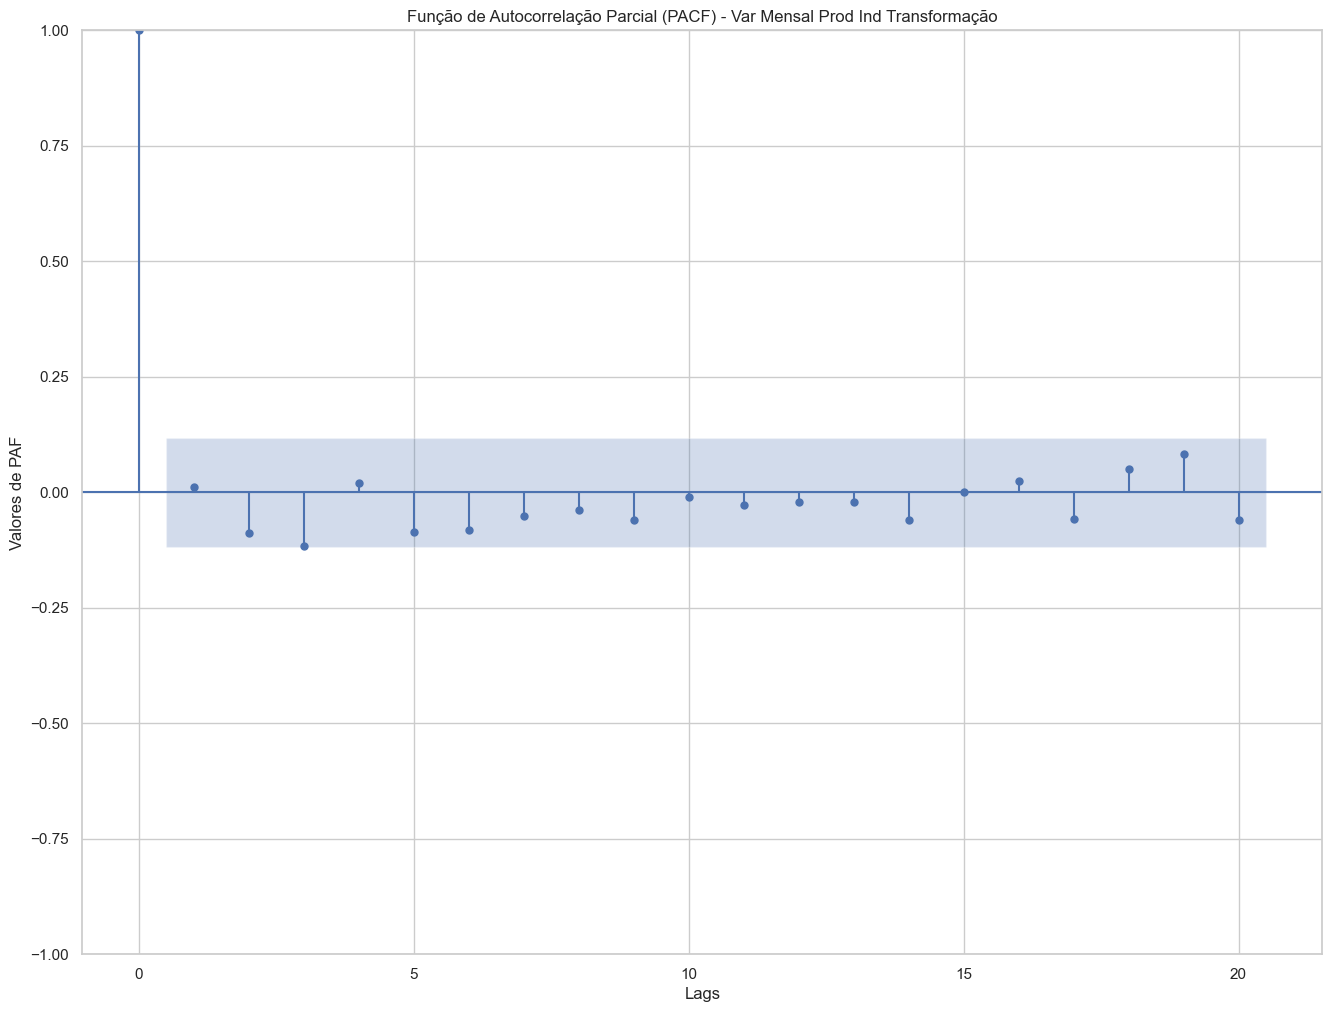

In [147]:
#Gráfico de PACF

plot_pacf(df1_8888_var["3 Indústrias de transformação"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal Prod Ind Transformação")
plt.xlabel("Lags")
plt.ylabel("Valores de PAF")
plt.show()

## Criação de dados em formato csv

In [149]:
df1_8888_var.to_csv("base_dados_pimpf_dessazonal.csv", index=False)

## Criação de Dados de Variação Mensal Sem Ajuste Sazonal

Para criação de dados de variação mensal sem ajuste sazonal será necessário utilizar a base de dados de número índice da PIM-PF sem ajuste sazonal

In [151]:
#Criação de cópia do dataframe para uso:

df_8888_var_bruto = df1_8888_ind.copy()

In [153]:
# Criação de uma nova coluna com a variação percentual mensal da coluna "3 Indústrias de Transformação"

df_8888_var_bruto['Ind Transf Sem Ajuste Sazonal Var Men (%)'] = df_8888_var_bruto["3 Indústrias de transformação"].pct_change() * 100

In [156]:
#Remoção da primeira linha do dataFrame

df_8888_var_bruto = df_8888_var_bruto.iloc[1:,].reset_index(drop=True)

## Ajuste do formato de data para AAAA - MM - DD

In [158]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '2/28/2002', 
                         end = '03/31/2025', 
                         freq = 'M')

In [159]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe da variação mensal da PIM-PF

len(date_rng) == len(df_8888_var_bruto.index)

True

In [160]:
#Inclusão do dataframe date_rng no dataframe df_8888_var_bruto

df_8888_var_bruto.insert(0,        # coluna de indice 0
                  'Mês',    # nome da nova coluna
                  date_rng)  # dados

In [161]:
#Exclusão da coluna "Data"

df_8888_var_bruto = df_8888_var_bruto.drop(["Data"], axis = 1)

## Avaliação da Série de Variação Mensal % de Produção da Indústria de Transformação SEM AJUSTE SAZONAL

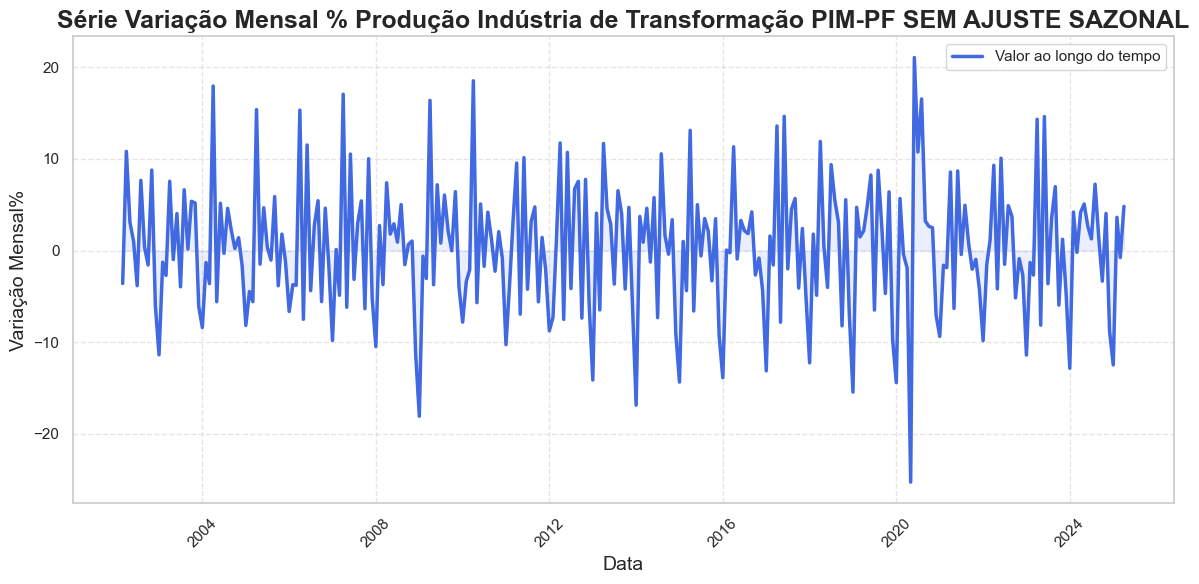

In [164]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_8888_var_bruto["Mês"], df_8888_var_bruto["Ind Transf Sem Ajuste Sazonal Var Men (%)"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df_8888_var_bruto["Mês"], df_8888_var_bruto["Ind Transf Sem Ajuste Sazonal Var Men (%)"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série Variação Mensal % Produção Indústria de Transformação PIM-PF SEM AJUSTE SAZONAL', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Avaliação de Estacionariedade da Série

In [165]:
#Teste de ADF - Variação Mensal da Produção da Indústria de Transformação SEM AJUSTE SAZONAL

resultado = adfuller(df_8888_var_bruto["Ind Transf Sem Ajuste Sazonal Var Men (%)"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -4.736770
p-value: 0.000072
Valores Críticos:
	1%: -3.455
	5%: -2.873
	10%: -2.573


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Para o nível de confiança de 95%, rejeita-se a hipótese de que a série da Variação Mensal da Produção da Indústria de Transformação SEM AJUSTE SAZONAL não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [166]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos. Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_8888_var_bruto["Ind Transf Sem Ajuste Sazonal Var Men (%)"], model='additive', period = 12)

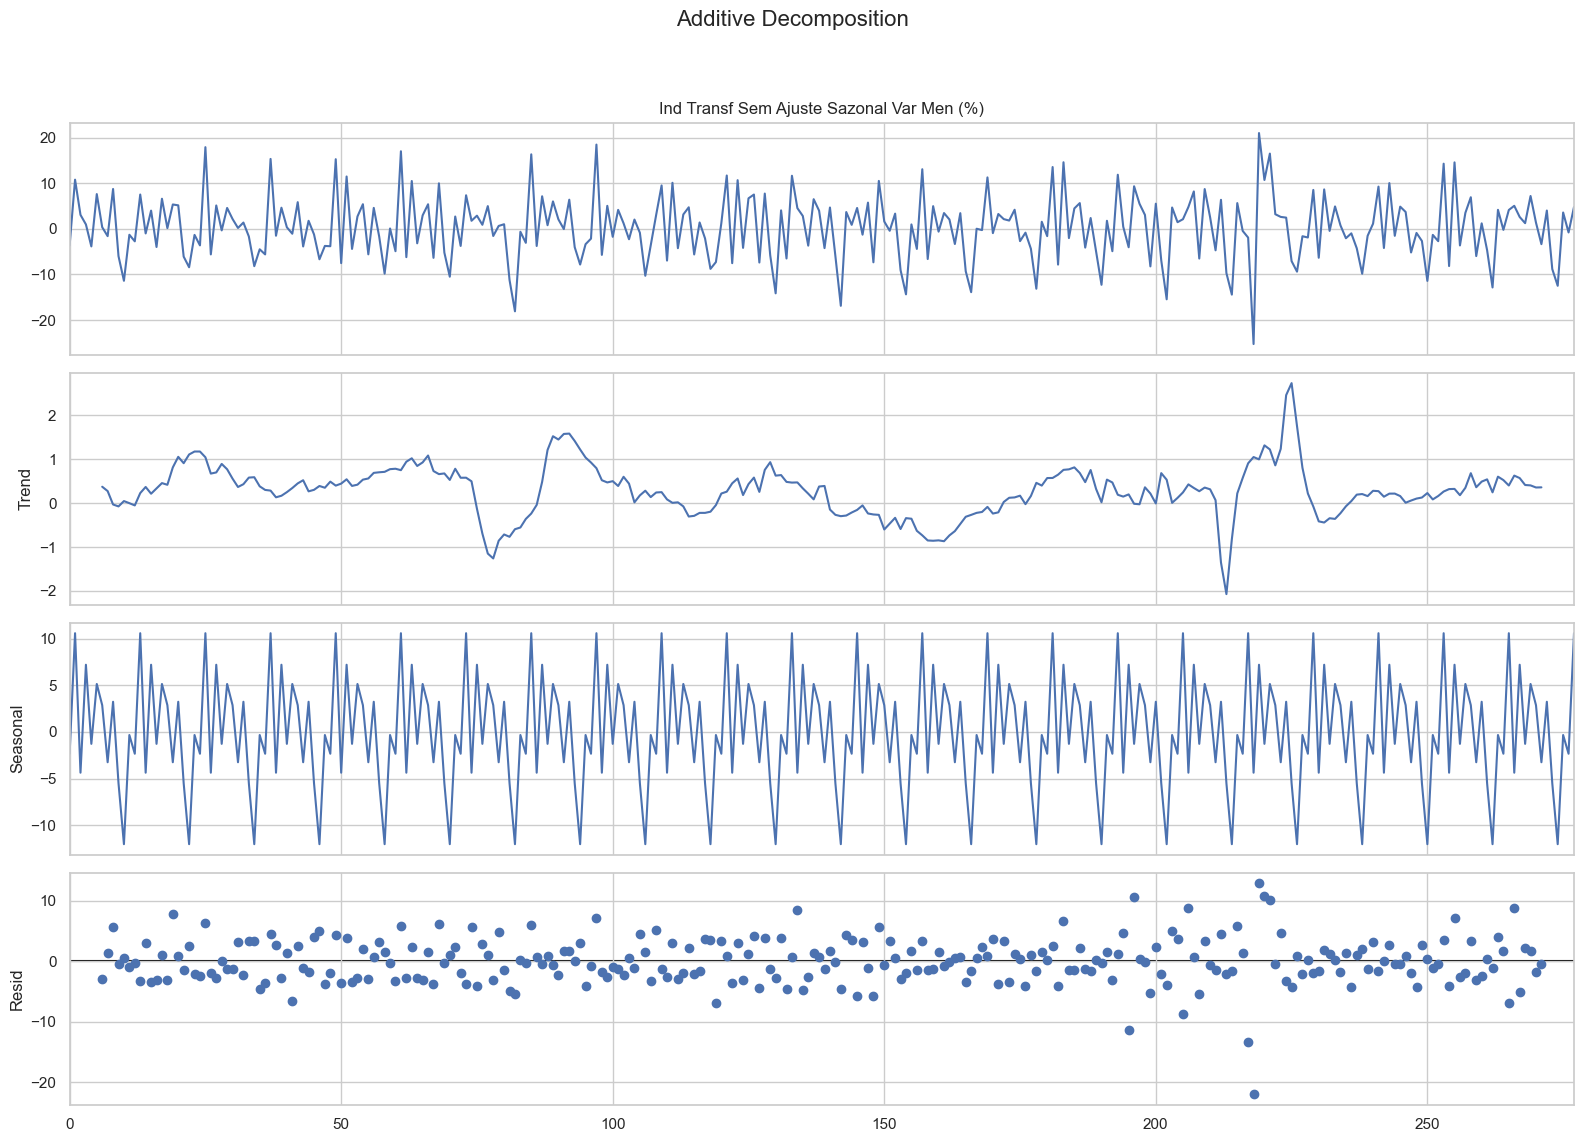

In [167]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

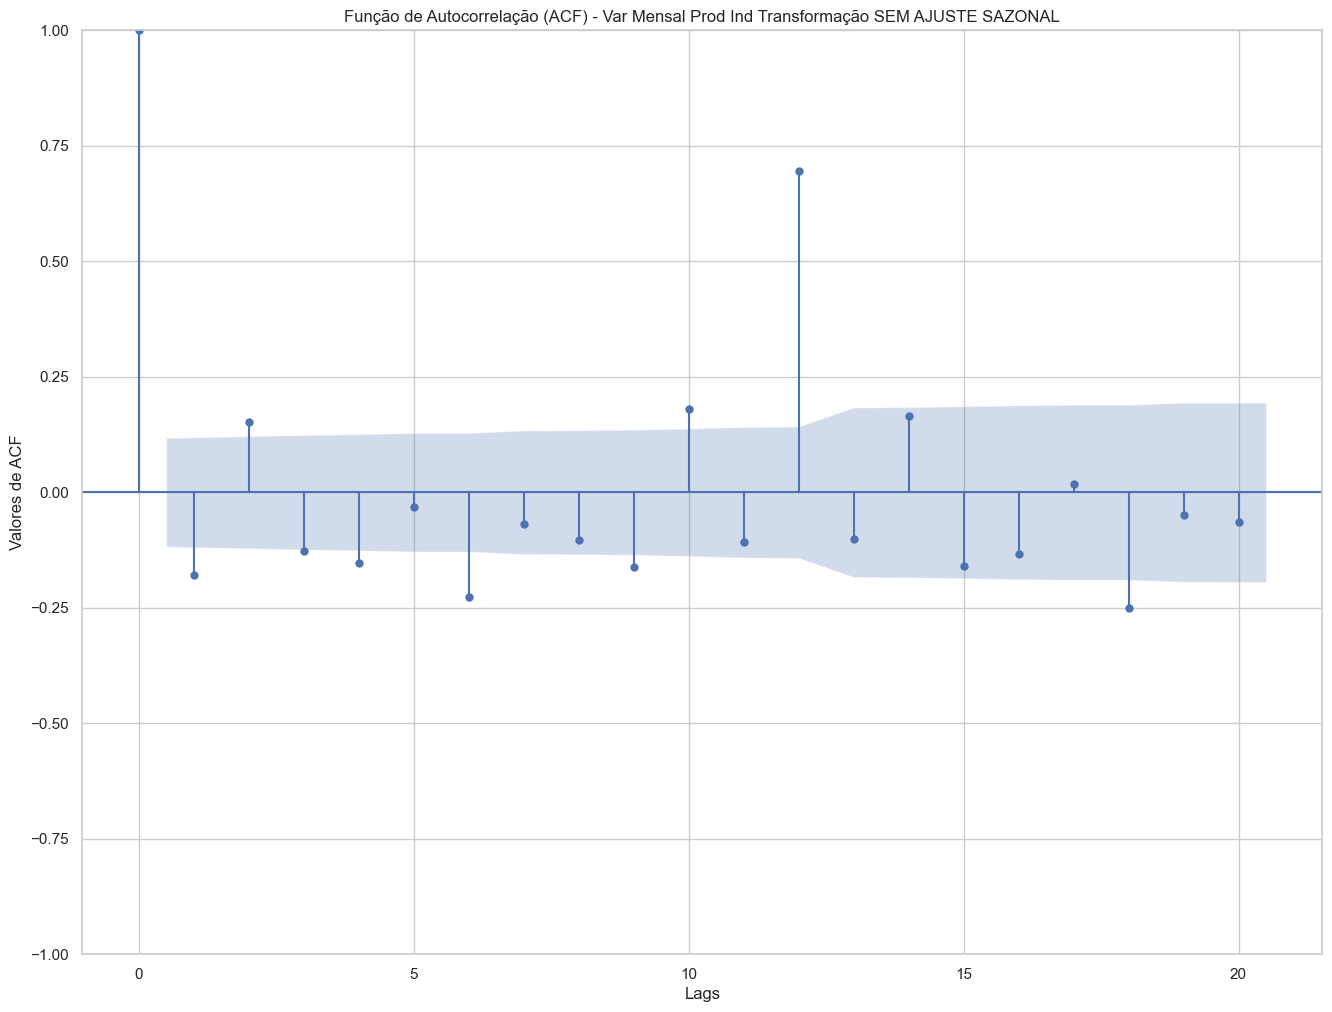

In [168]:
#Gráfico de ACF

plot_acf(df_8888_var_bruto["Ind Transf Sem Ajuste Sazonal Var Men (%)"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal Prod Ind Transformação SEM AJUSTE SAZONAL")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

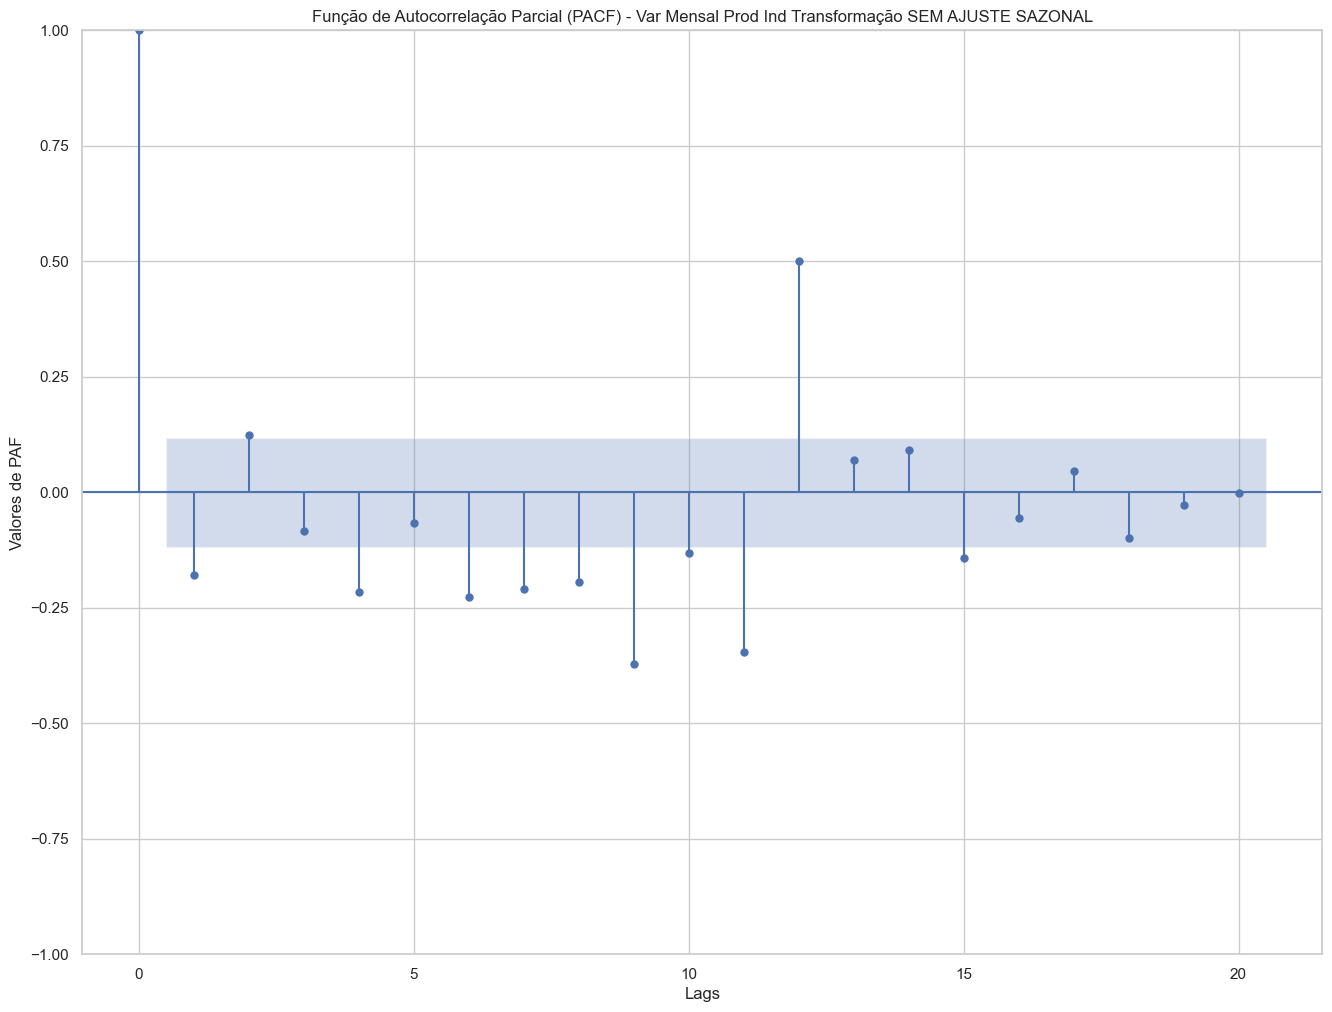

In [169]:
#Gráfico de PACF

plot_pacf(df_8888_var_bruto["Ind Transf Sem Ajuste Sazonal Var Men (%)"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal Prod Ind Transformação SEM AJUSTE SAZONAL")
plt.xlabel("Lags")
plt.ylabel("Valores de PAF")
plt.show()

## Criação de dados em formato csv

In [170]:
df_8888_var_bruto.to_csv("base_dados_pimpf.csv", index=False)